<a href="https://colab.research.google.com/github/MatheusABomfim/ML_HTLV_HAM-TSP/blob/main/ML_MEST_HTLV%2BMBL2%2BCLINICAL_01_03_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notes/reminders:

* Clinical data has been excluded
(because they will still be extracted from the medical records, classifying the oligosymptomatic patients separately, allowing a better evaluation of the machine)

* This script is based on the file: "Based on the ML Wine data set" with the appropriate modifications.

* It uses only one machine-learning evaluation model, several of which will be used in the final master's work. The current script corresponds to a training script developed in conjunction with pacific (more complex).

# Dictionary:
* In column: MBL-550
  * HH = 0
  * HL = 1
  * LL = 2
  
* In column: MBL-221
  * YY = 0
  * YX = 1
  * xx = 2

* In column: MBL EXON
  * AO = 0
  * AA = 1
  * OO = 2

* In column: SEX
  * M = 0
  * F = 1

* In column: HAM/TSP
 * No myelopathy = 0
 * HAM/TSP = 1

In [ ]:
# Att Scikit-learn
!pip uninstall scikit-learn
!pip install scikit-learn

# Install shap package (não consta no google colab)
!pip install shap #Corrigir erro do shap

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.2.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? y
  Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 3.5 MB/s eta 0:00:00


In [1]:
# Import data and packages for work:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score,roc_curve, auc, make_scorer, precision_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from scipy.stats import skew, kurtosis
import shutil
import os

# Data selection
dados_iniciais_Vanessa = ('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Treinamento_inicial_ML/ML_(base_wine_dataset)_para_dados_MBL_Ana_patrícia/Resultados_final(MBL+Clinica)/tabela_Vanessa_Treinamento_ML.csv')

# Ignoring flags
import warnings
warnings.filterwarnings('ignore')

# Importing and processing data:

In [2]:
# Import initial file "dados_iniciais_Vanessa"
df = pd.read_table(dados_iniciais_Vanessa, sep=',')  # sep= parâmetro separador(;)
nome_arquivo = os.path.basename(dados_iniciais_Vanessa).split(".")  # obtem o nome do arquivo = os.path.basename(arquivo) e split obtém o nome em partes separadas por ponto
nome_arquivo = nome_arquivo[0]  # obtem o nome do arquivo sem a extensão
caminho_arquivo = os.path.dirname(dados_iniciais_Vanessa) #obtem o caminho do arquivo, sem o nome dele (arquivo)

**Creating a storage directory**

In [3]:
# Checking the directory
diretorio_name = caminho_arquivo + "/" + nome_arquivo  # cria o diretório a partir das variáveis acima de caminho e nome_arquivo
try:
    os.mkdir(diretorio_name)  # tenta criar o diretório
    print("Novo Diretório Criado! \n")
except FileExistsError:
    print("O diretório já existe!")
    print(diretorio_name)
    print("--> Verifique se ele está vazio, ou possui arquivos! \n")

# Dataframe format (rows, columns)
print('Dados carregados! \nO seu dado apresenta o seguinte quantitativo de (linhas, colunas):', df.shape)

O diretório já existe!
/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Treinamento_inicial_ML/ML_(base_wine_dataset)_para_dados_MBL_Ana_patrícia/Resultados_final(MBL+Clinica)/tabela_Vanessa_Treinamento_ML
--> Verifique se ele está vazio, ou possui arquivos! 

Dados carregados! 
O seu dado apresenta o seguinte quantitativo de (linhas, colunas): (155, 68)


In [4]:
# Transformation of categorical nominal data into categorical numerical data:
df['SEXO'] = df['SEXO'].replace('M',0)
df['SEXO'] = df['SEXO'].replace('F',1)
df['HAM/TSP'] = df['HAM/TSP'].replace('NÃO',0)
df['HAM/TSP'] = df['HAM/TSP'].replace('SIM',1)

# Elimination of data that is cloudy:
df_filtered = df[df['HAM/TSP'].isin(['1', '0'])]
df_filtered = df[df['HAM/TSP'].isin(['1', '0'])]

# Delete columns that will not be used:
df = df.drop('SINTOMAS', axis=1)
df = df.drop('SINT. DET.', axis=1)
df = df.drop('ANO DE DIAGNOSTICO', axis=1)
df = df.drop('NOME', axis=1)
df = df.drop('REGISTRO', axis=1)
df = df.drop('NUM AMO', axis=1)

# Transforming string data into float64:
df['HAM/TSP'] = pd.to_numeric(df['HAM/TSP'],errors = 'coerce')

# Removal of rows with null values:
df = df.dropna()

In [ ]:
df.columns

Index(['SEXO', 'Idade 2018 (2019 AZUL)', 'HAM/TSP', 'MBL-550', 'MBL -221',
       'MBL EXON', 'Incontinência Urinária', 'dor urinária', 'parestesia',
       'Paresia', 'Hipereflexia', 'Hipereflexia em MMII', 'Hiperatividade',
       'fraqueza', 'caroços no corpo', 'disúria', 'Deficit motor', 'Dormência',
       'Dor', 'Dor Articular', 'Dor na bexiga', 'Dor na lombar', 'Dor em MMII',
       'perda auditiva', 'Hipertensão', 'marcha espática', 'artrose',
       'dificuldade de deambular', 'Perda de força', 'Espasticidade',
       'Noctúria', 'Neuropatia', 'Bexiga neurogênica', 'Surtos psiquicos',
       'Crises compulsivas', 'Insônia', 'hipertomocidade', 'Cadeirante',
       'Mielopatia', 'Câimbras', 'Diabetes', 'Obesidade', 'Depressão ',
       'Ansiedade', 'Poliaciúria', 'Baixo fluxo urinário', 'Esquizofrenia',
       'Problemas nos MMII', 'Edema MMSS', 'Doença psiquiátrica',
       'Osteoporose', 'Insuficiência renal crônica',
       'Descontrole esfincteriano', 'Hérnia', 'Dificuldade 

In [5]:
# Data division
# Binary categorical data
cat_bin = ['SEXO', 'Idade 2018 (2019 AZUL)', 'HAM/TSP', 'MBL-550', 'MBL -221', 'MBL EXON', 'Incontinência Urinária', 'dor urinária', 'parestesia',
       'Paresia', 'Hipereflexia', 'Hipereflexia em MMII', 'Hiperatividade',
       'fraqueza', 'caroços no corpo', 'disúria', 'Deficit motor', 'Dormência',
       'Dor', 'Dor Articular', 'Dor na bexiga', 'Dor na lombar', 'Dor em MMII',
       'perda auditiva', 'Hipertensão', 'marcha espática', 'artrose',
       'dificuldade de deambular', 'Perda de força', 'Espasticidade',
       'Noctúria', 'Neuropatia', 'Bexiga neurogênica', 'Surtos psiquicos',
       'Crises compulsivas', 'Insônia', 'hipertomocidade', 'Cadeirante',
       'Mielopatia', 'Câimbras', 'Diabetes', 'Obesidade', 'Depressão ',
       'Ansiedade', 'Poliaciúria', 'Baixo fluxo urinário', 'Esquizofrenia',
       'Problemas nos MMII', 'Edema MMSS', 'Doença psiquiátrica',
       'Osteoporose', 'Insuficiência renal crônica',
       'Descontrole esfincteriano', 'Hérnia', 'Dificuldade de urinar',
       'Fraqueza ', 'Hipotireodismo', 'Descontrole urinário',
       'Síndrome piramidal', 'Dermatite', 'Sífilis', 'Infecções recorrentes']

# Multiple categorical data
cat_mult= ['SINTOMAS', 'MBL-550', 'MBL -221', 'MBL EXON']

# All data
all_data = cat_bin + cat_mult

**Exploratory analysis**




Cleaning null data

In [6]:
#print(df)
#df.shape
#df.columns
df = df.loc[:, ~df.columns.isin(['Baixo fluxo urinário', 'Câimbras', 'Edema MMSS'])]

Analysis of mean, variance, standard deviation, skewness, kurtosis and maximum and minimum values per column

In [7]:
# Calculation of appraised values
mean = df.mean()
var = df.var()
skewness = df.apply(skew)
kurt = df.apply(kurtosis)

# Printing results
with open('Exploratory_Analysis.txt', 'w') as arquivo:
  for i in range(len(df.columns)):
    coluna = df.columns[i]
    print(f'Coluna: {coluna}', file=arquivo)
    print('Média:', df.iloc[:, i].mean(), file=arquivo)
    print('Variância:', df.iloc[:, i].var(), file=arquivo)
    print('Desvio Padrão:', df.iloc[:, i].std(), file=arquivo)
    print('Assimetria:', skew(df.iloc[:, i]), file=arquivo)
    print('Curtose:', kurtosis(df.iloc[:, i]), file=arquivo)
    print('Val. Min:', df.iloc[:, i].min(), file=arquivo)
    print('Val. Max:', df.iloc[:, i].max(), file=arquivo)
    print(file=arquivo)

# Organizing the results and sending them to the drive

caminho_arquivo = '/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Exploratory_Analysis.txt'
if os.path.exists(caminho_arquivo):
    os.remove(caminho_arquivo)
    print('Old file successfully removed.')

destino = '/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/'
shutil.move('Exploratory_Analysis.txt', destino)
print('File moved to destination directory.')


Old file successfully removed.
File moved to destination directory.


Target frequency distribution (HAM/TSP)

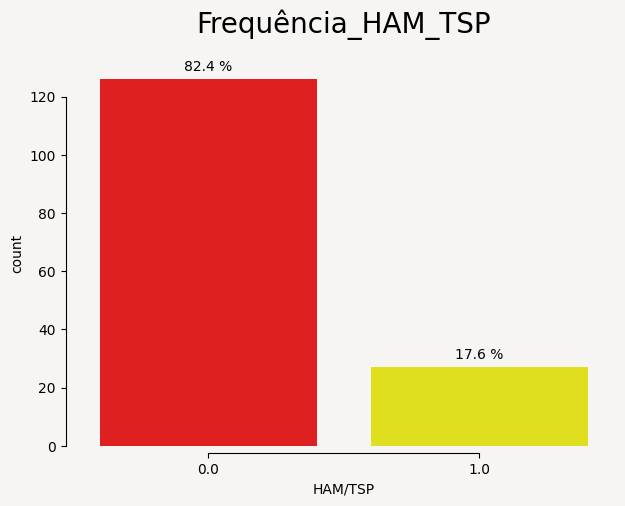

In [ ]:
# Color palette
mypal= ['#FF0000', '#FF4500', '#FFFF00','#FFFFE0', '#87CEEB','#0000CD']

# Bar Graph for Distribution of Variables
plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
total = float(len(df))
ax = sns.countplot(x=df['HAM/TSP'], palette=mypal[0::2])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:

    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center")

ax.set_title('Frequência HAM TSP', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

# Save the graphic in PDF
plt.savefig('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Treinamento_inicial_ML/ML_(base_wine_dataset)_para_dados_MBL_Ana_patrícia/Resultados_sem_dados_clínicos/' + 'Frequência_HAM_TSP.pdf')

Pearson correlation matrix (heatmap):

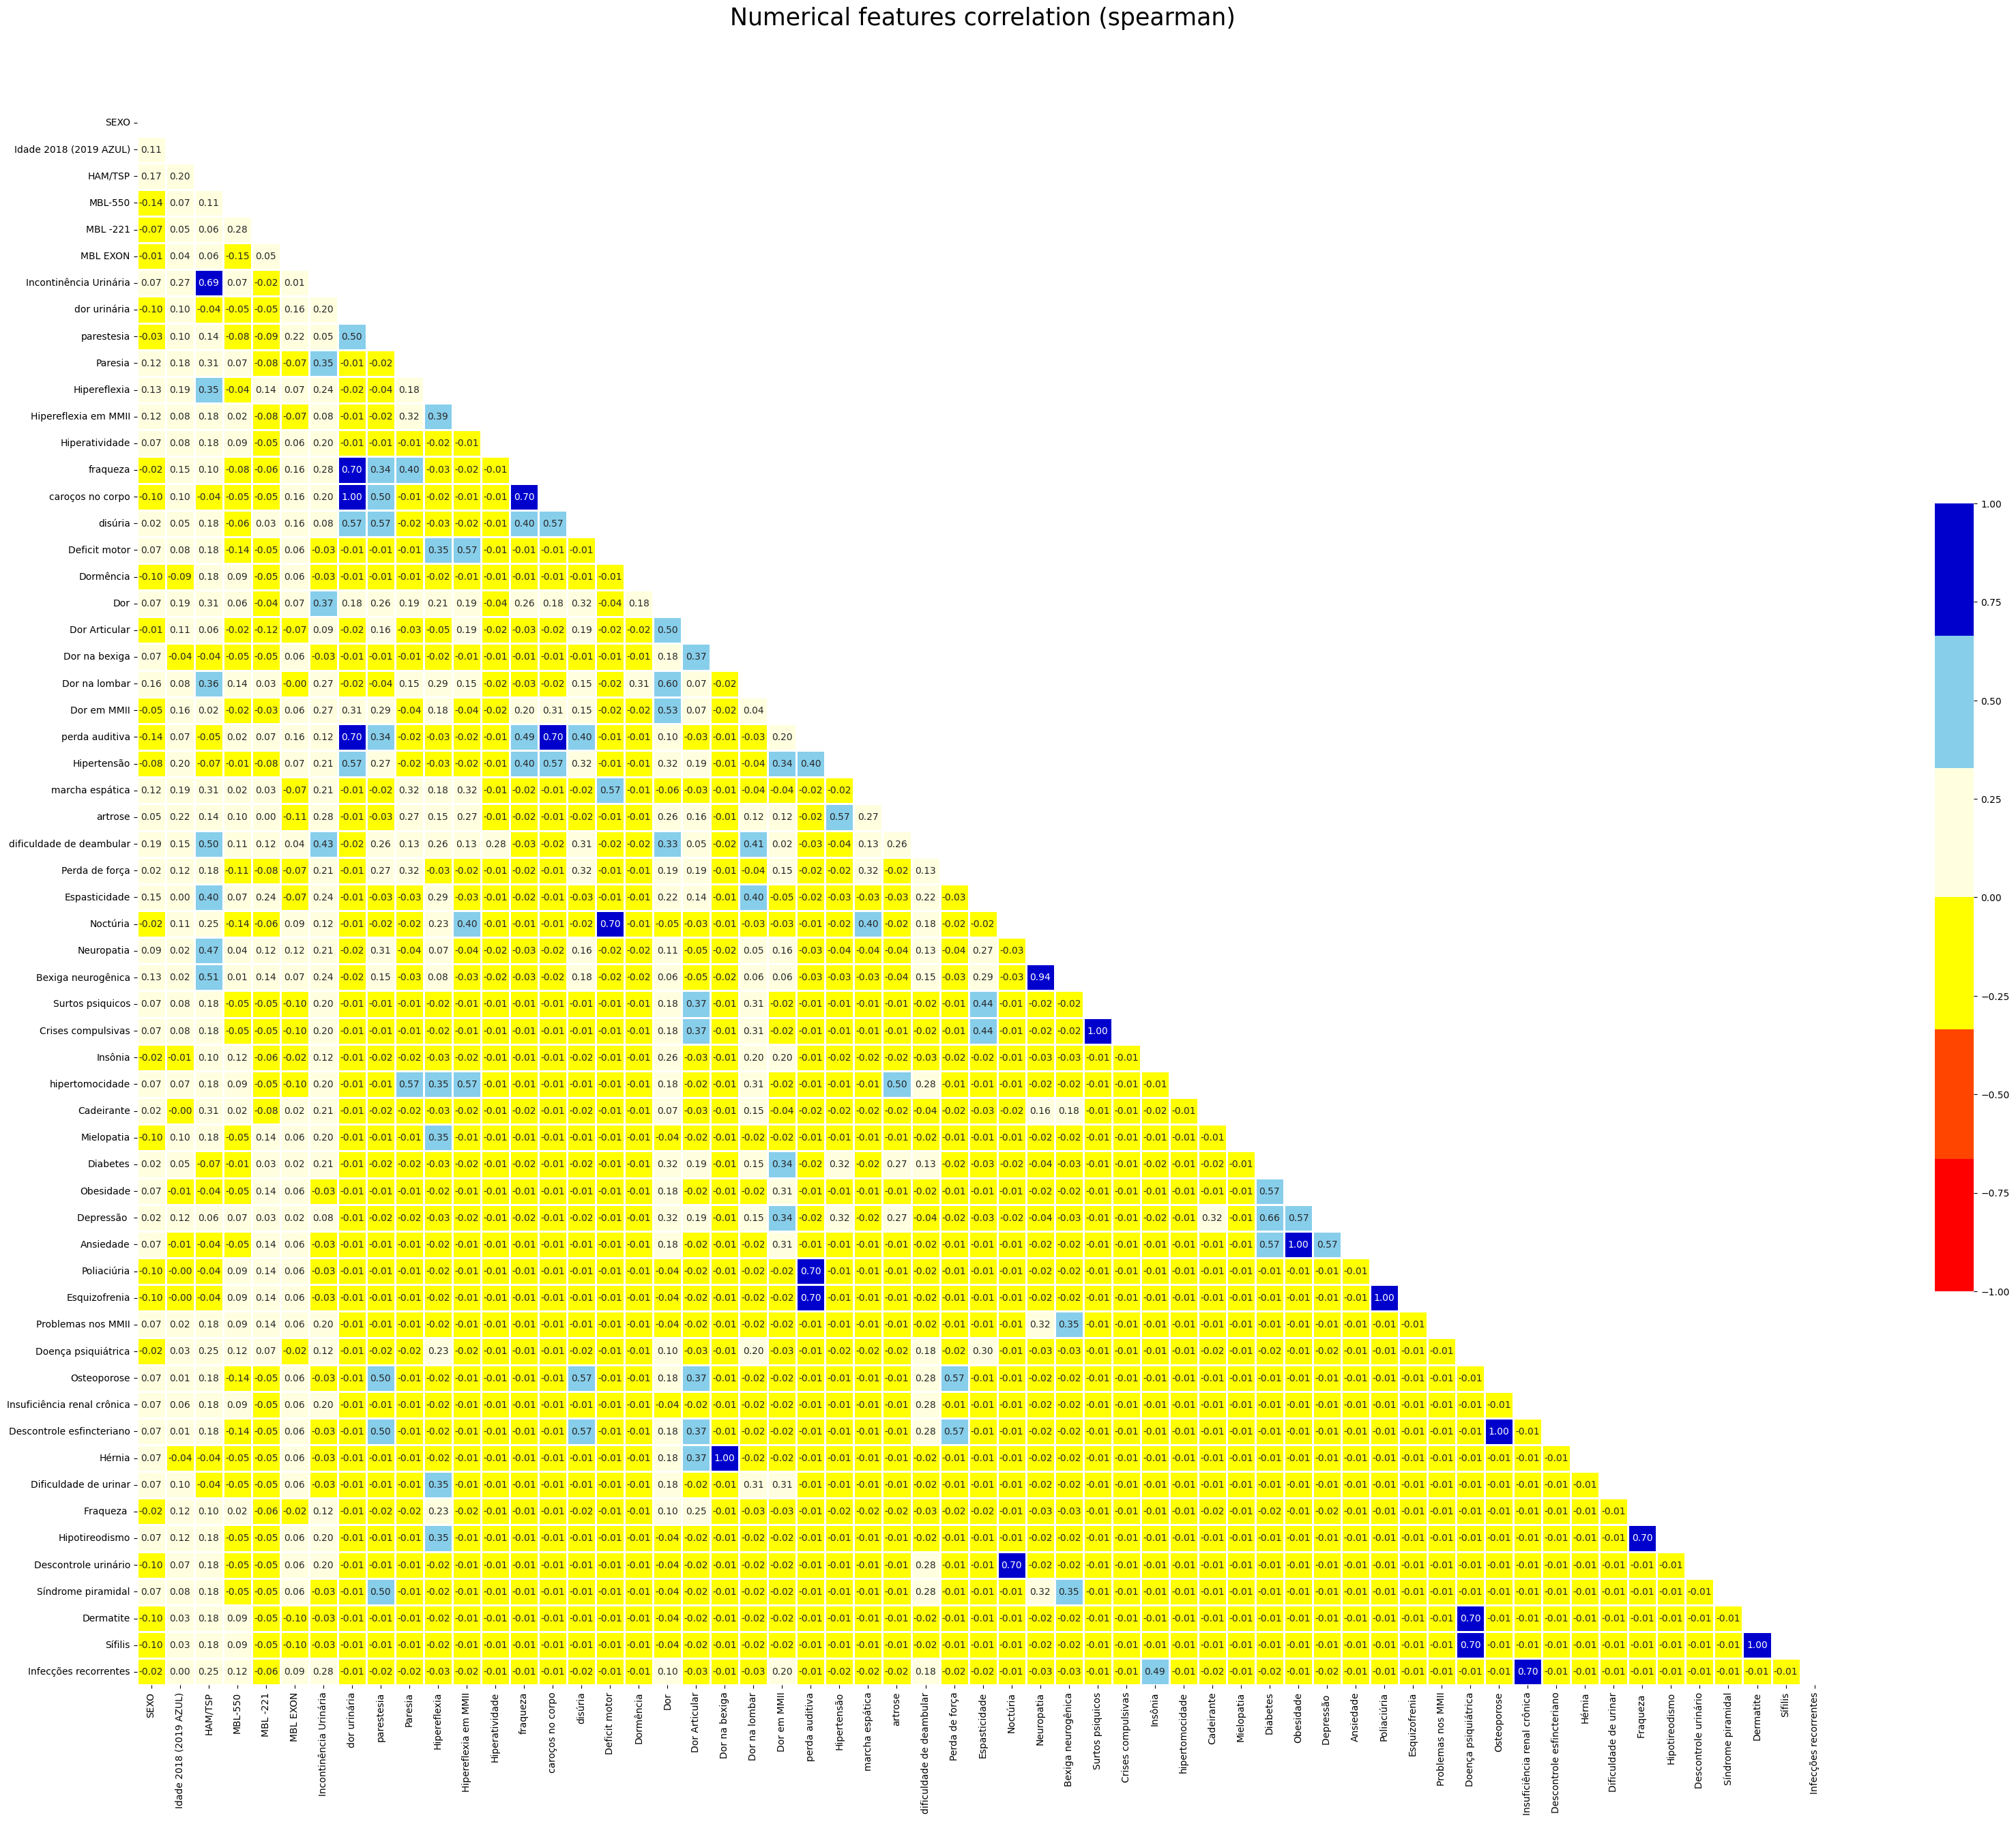

In [8]:
# Correlation
mypal= ['#FF0000', '#FF4500', '#FFFF00','#FFFFE0', '#87CEEB','#0000CD']
metodo_correlacao = "spearman"
df_ = df

#df_ = np.round(df_.reset_index(drop=True), 2)
corr = df_.corr(method= metodo_correlacao) #method : {'pearson', 'kendall', 'spearman'}
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(40, 30), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=1, cbar_kws={"shrink": 0.5}, fmt='.2f')
ax.set_title("Numerical features correlation ("+metodo_correlacao+")", fontsize=25, y= 1.05);


# Save the graphic in PDF
plt.savefig('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/' + 'plot_heatmap_corr_pearson.pdf')

plt.show()

Visualization of data distribution
Future use on laboratory and quantitative data




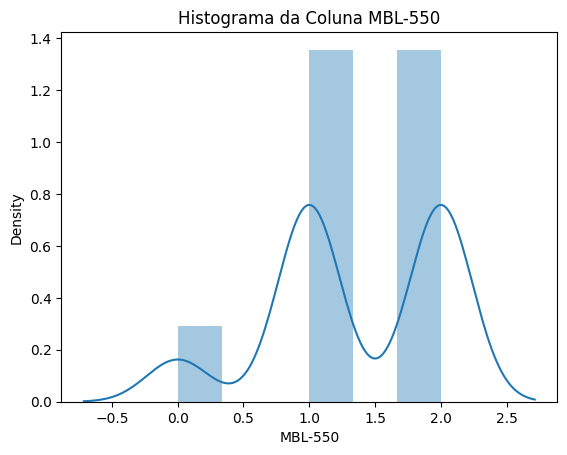

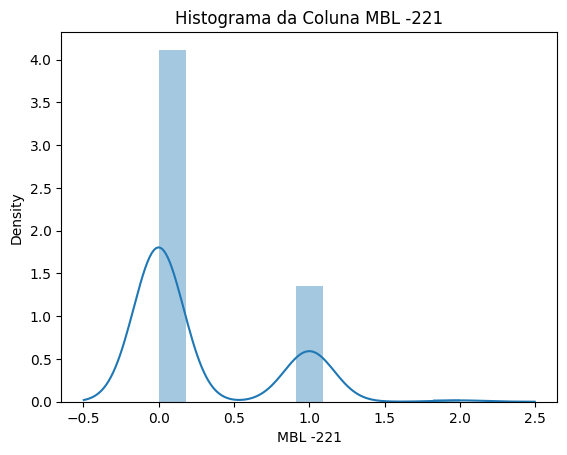

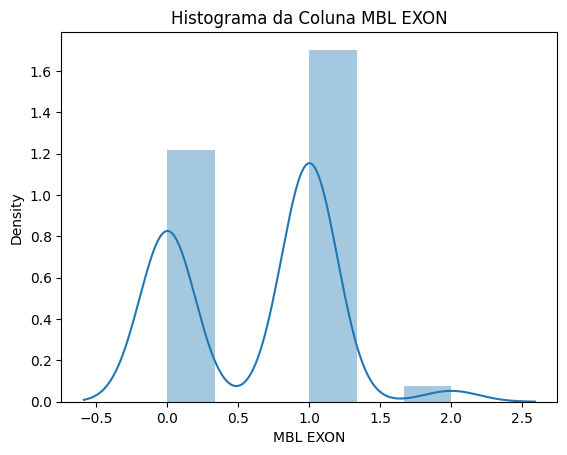

Old file successfully removed.
File moved to destination directory.


In [ ]:
# Calculation of histograms of collumns

# Printing results
with open('Distribution_curves.txt', 'w') as arquivo:
 for coluna in ['MBL-550', 'MBL -221', 'MBL EXON']:
    plt.figure()
    sns.distplot(df[coluna])
    plt.title(f'Histograma da Coluna {coluna}')
    plt.show()
# Organizing the results and sending them to the drive

caminho_arquivo = '/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Distribution_curves.txt'
if os.path.exists(caminho_arquivo):
    os.remove(caminho_arquivo)
    print('Old file successfully removed.')

destino = '/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/'
shutil.move('Distribution_curves.txt', destino)
print('File moved to destination directory.')

Cleaning non-numerical data with no predictive value for ML

In [9]:
# Separate the variables into predictors and target variables (style);
y = df['HAM/TSP'] # Target variables;
x = df.drop('HAM/TSP', axis = 1) # Predict variables, without aim;

#**Cross-validation + ROC Curve + Mean AUC**


Média da precisão: 0.0
Media do desvio padrão: 0.0
Média da acurácia: 0.8236559139784946
Media da taxa de recall: 0.0
Media do parâmetro f1: 0.0


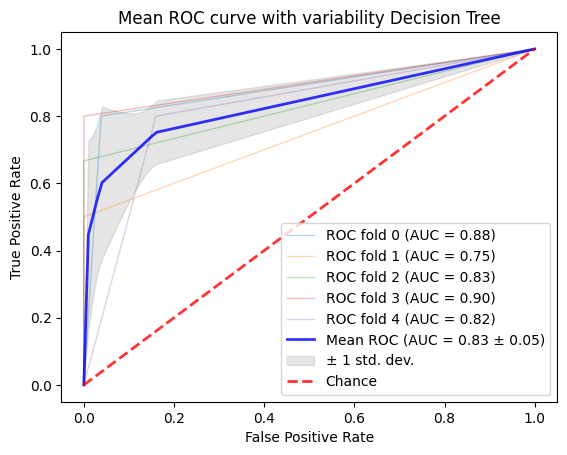

Média da precisão: 0.86
Media do desvio padrão: 0.19595917942265426
Média da acurácia: 0.9148387096774193
Media da taxa de recall: 0.7133333333333333
Media do parâmetro f1: 0.7541880341880342


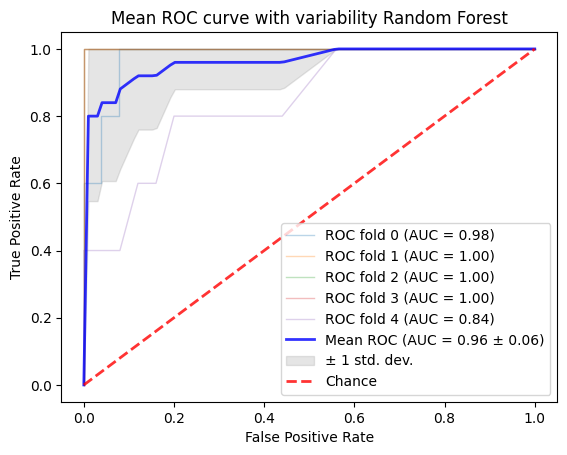

Média da precisão: 0.8300000000000001
Media do desvio padrão: 0.23579652245103191
Média da acurácia: 0.9015053763440861
Media da taxa de recall: 0.7066666666666667
Media do parâmetro f1: 0.7329292929292929


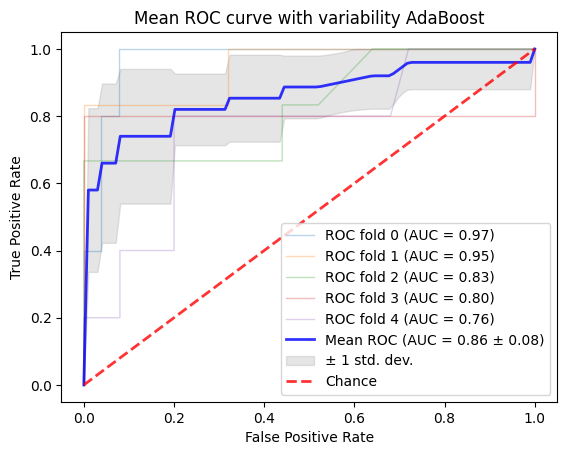

Média da precisão: 0.8400000000000001
Media do desvio padrão: 0.233238075793812
Média da acurácia: 0.9079569892473118
Media da taxa de recall: 0.6266666666666667
Media do parâmetro f1: 0.7051515151515152


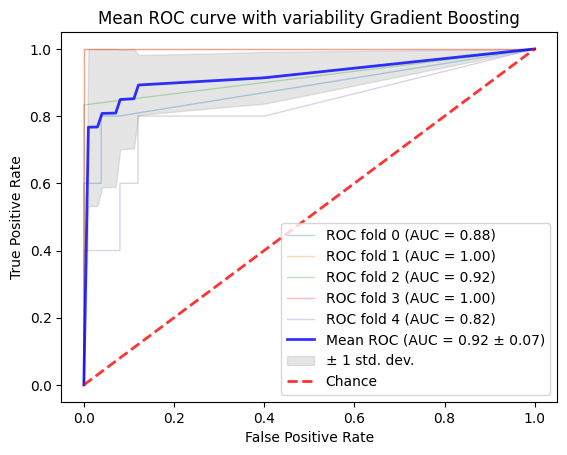

Média da precisão: 0.8742857142857142
Media do desvio padrão: 0.17009001218442535
Média da acurácia: 0.921505376344086
Media da taxa de recall: 0.7133333333333333
Media do parâmetro f1: 0.7644444444444444


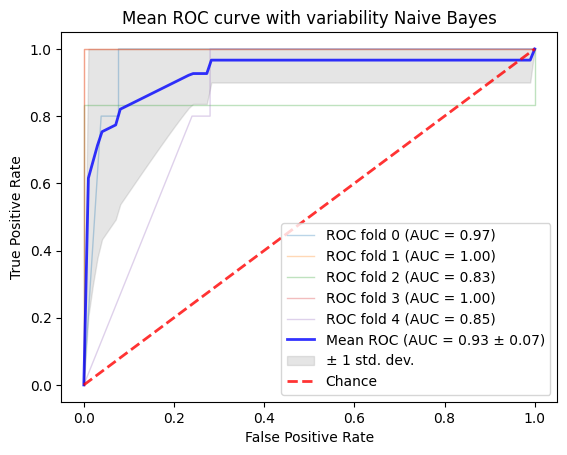

Média da precisão: 0.8327272727272726
Media do desvio padrão: 0.24700520287624286
Média da acurácia: 0.8948387096774194
Media da taxa de recall: 0.7133333333333333
Media do parâmetro f1: 0.7195959595959596


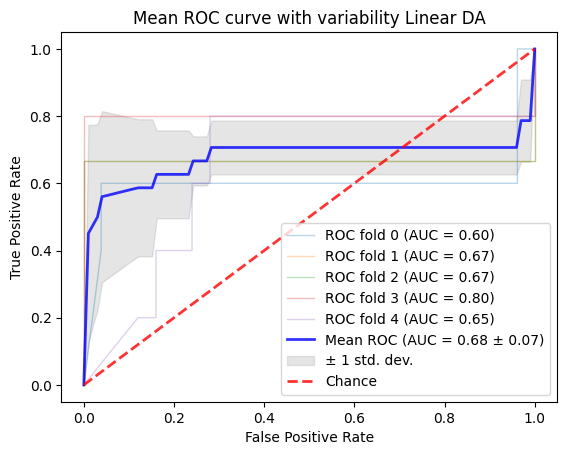

Média da precisão: 0.8071428571428572
Media do desvio padrão: 0.2781131761990255
Média da acurácia: 0.8688172043010752
Media da taxa de recall: 0.48666666666666664
Media do parâmetro f1: 0.5833333333333333


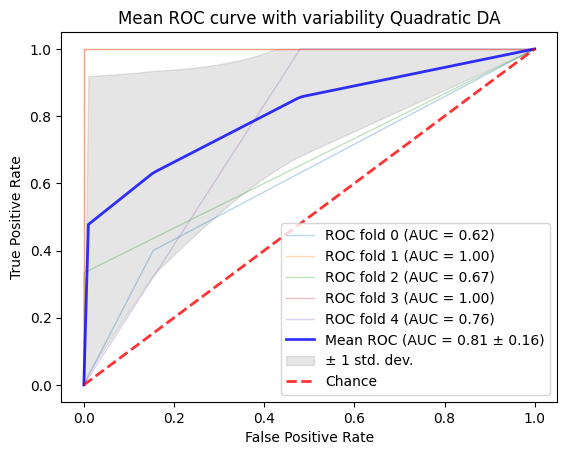

Média da precisão: 0.7254901960784312
Media do desvio padrão: 0.33643310728670145
Média da acurácia: 0.8490322580645161
Media da taxa de recall: 0.7466666666666667
Media do parâmetro f1: 0.6636363636363636


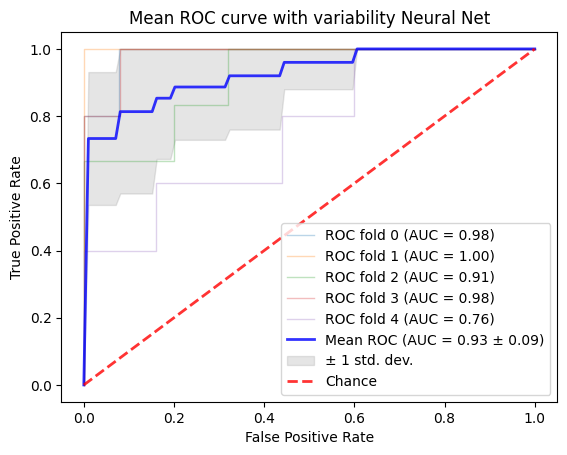

Média da precisão: 0.8666666666666666
Media do desvio padrão: 0.26666666666666666
Média da acurácia: 0.8819354838709677
Media da taxa de recall: 0.5666666666666667
Media do parâmetro f1: 0.6306349206349205


In [10]:
# Clearing old data from the data_table, if the code has been run previously
data_table = pd.DataFrame()
seed = 42
n_splits = 5

# List of ML packages that we will run
classifiers = [
    LogisticRegression(solver="liblinear", random_state=seed),
    KNeighborsClassifier(2),
    SVC(probability=True, random_state=seed),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(random_state=seed),
]

# Name of ML algorithms that we will use
names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Support Vectors',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Linear DA',
    'Quadratic DA',
    "Neural Net"
]

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits)

# Creating the avaliatives metrics for ROC curve
for item, nome in zip(classifiers, names):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

# Testing the model
    for fold, (train_index, test_index) in enumerate(skf.split(x, y)): # metrics
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        item.fit(x_train, y_train)

# Ploting avaliative metrics of ROC curva
        y_proba = item.predict_proba(x_test)
        fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f"ROC fold {fold} (AUC = {roc_auc:.2f})")
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        aucs.append(roc_auc)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b', label=f"Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})", lw=2, alpha=0.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.2, label='± 1 std. dev.')

    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Mean ROC curve with variability ' + nome)
    plt.legend(loc="lower right")
    plt.savefig('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/' + 'Mean ROC curve with variability ' + nome + '.pdf')
    plt.show()

# Calculation and print of F1 and associated metrics
    precision_mean_score = cross_val_score(item, x, y, scoring="precision", cv=5).mean()
    std_score = cross_val_score(item, x, y, scoring="precision", cv=5).std()
    accuracy_mean_score = cross_val_score(item, x, y, scoring="accuracy", cv=5).mean()
    recall_mean_score = cross_val_score(item, x, y, scoring="recall", cv=5).mean()
    f1_mean_score = cross_val_score(item, x, y, scoring="f1", cv=5).mean()

    print(f"Média da precisão: {precision_mean_score}")
    print(f"Media do desvio padrão: {std_score}")
    print(f"Média da acurácia: {accuracy_mean_score}")
    print(f"Media da taxa de recall: {recall_mean_score}")
    print(f"Media do parâmetro f1: {f1_mean_score}")

# Creating the data frames that  values to be saved
    results_mean_precision = pd.DataFrame({'Precision Mean': [precision_mean_score]})
    results_mean_accuracy = pd.DataFrame({'Accuracy Mean': [accuracy_mean_score]})
    results_mean_recall = pd.DataFrame({'Recall Mean': [recall_mean_score]})
    results_mean_f1 = pd.DataFrame({'F1 Mean': [f1_mean_score]})

# creating the data frames (with the values of interest) that will be plotted in txt file
    f1_metrics = pd.DataFrame(
    [{
        "Nome": nome,
        "Accuracy": results_mean_accuracy.iloc[0]['Accuracy Mean'],
        "Recall": results_mean_recall.iloc[0]['Recall Mean'],
        "Precision": results_mean_precision.iloc[0]['Precision Mean'],
        "F1 Score": results_mean_f1.iloc[0]['F1 Mean'],
    }]
)

    data_table = data_table.append(f1_metrics)
data_table = np.round(data_table.reset_index(drop=True), 2)

# Aesthetic transformation similar to a heatmap
styled_table = data_table.sort_values(by='Accuracy', ascending=False)\
      .style.background_gradient(cmap='coolwarm')\
      .bar(subset=['Recall'], color='#ff355d')\
      .bar(subset=['Precision'], color='lightseagreen')\
      .bar(subset=['F1 Score'], color='gold')\

#plt.savefig('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/' + f'Mean ROC curve with variability {nome}.pdf')

# Save the generated excel file
styled_table.to_excel('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/'+"F1_metrics.xlsx", engine='openpyxl')

**Permutation importance evaluation**

Arquivo referente ao modelo Logistic Regression salvo com sucesso!


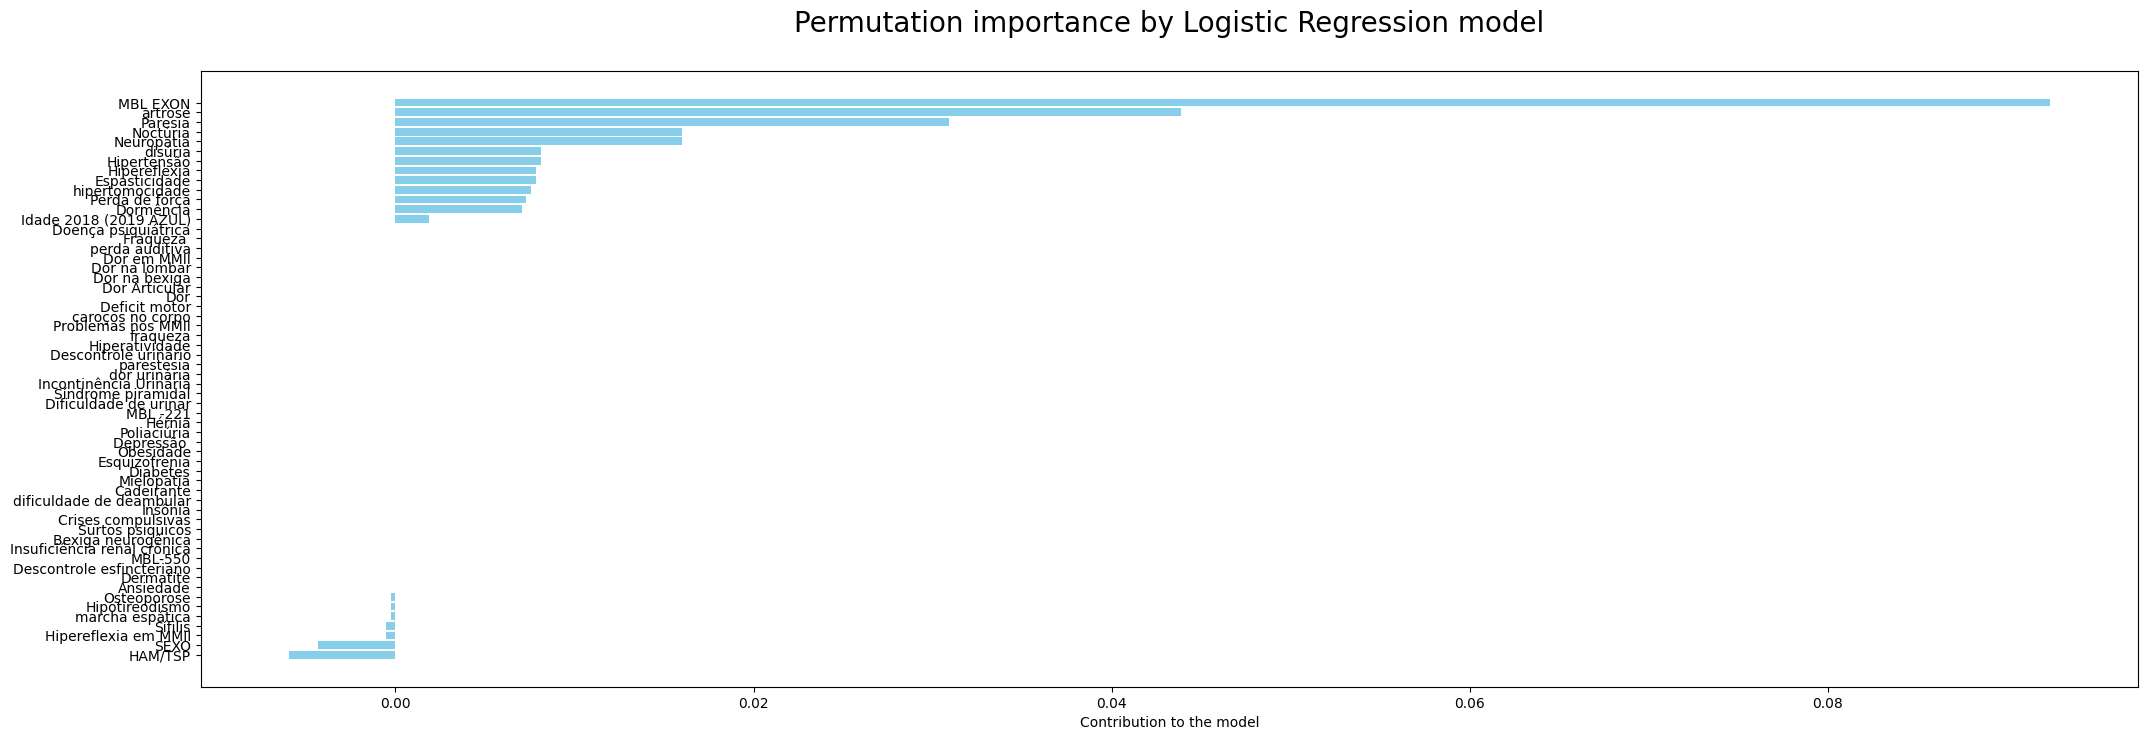

Arquivo referente ao modelo Nearest Neighbors salvo com sucesso!


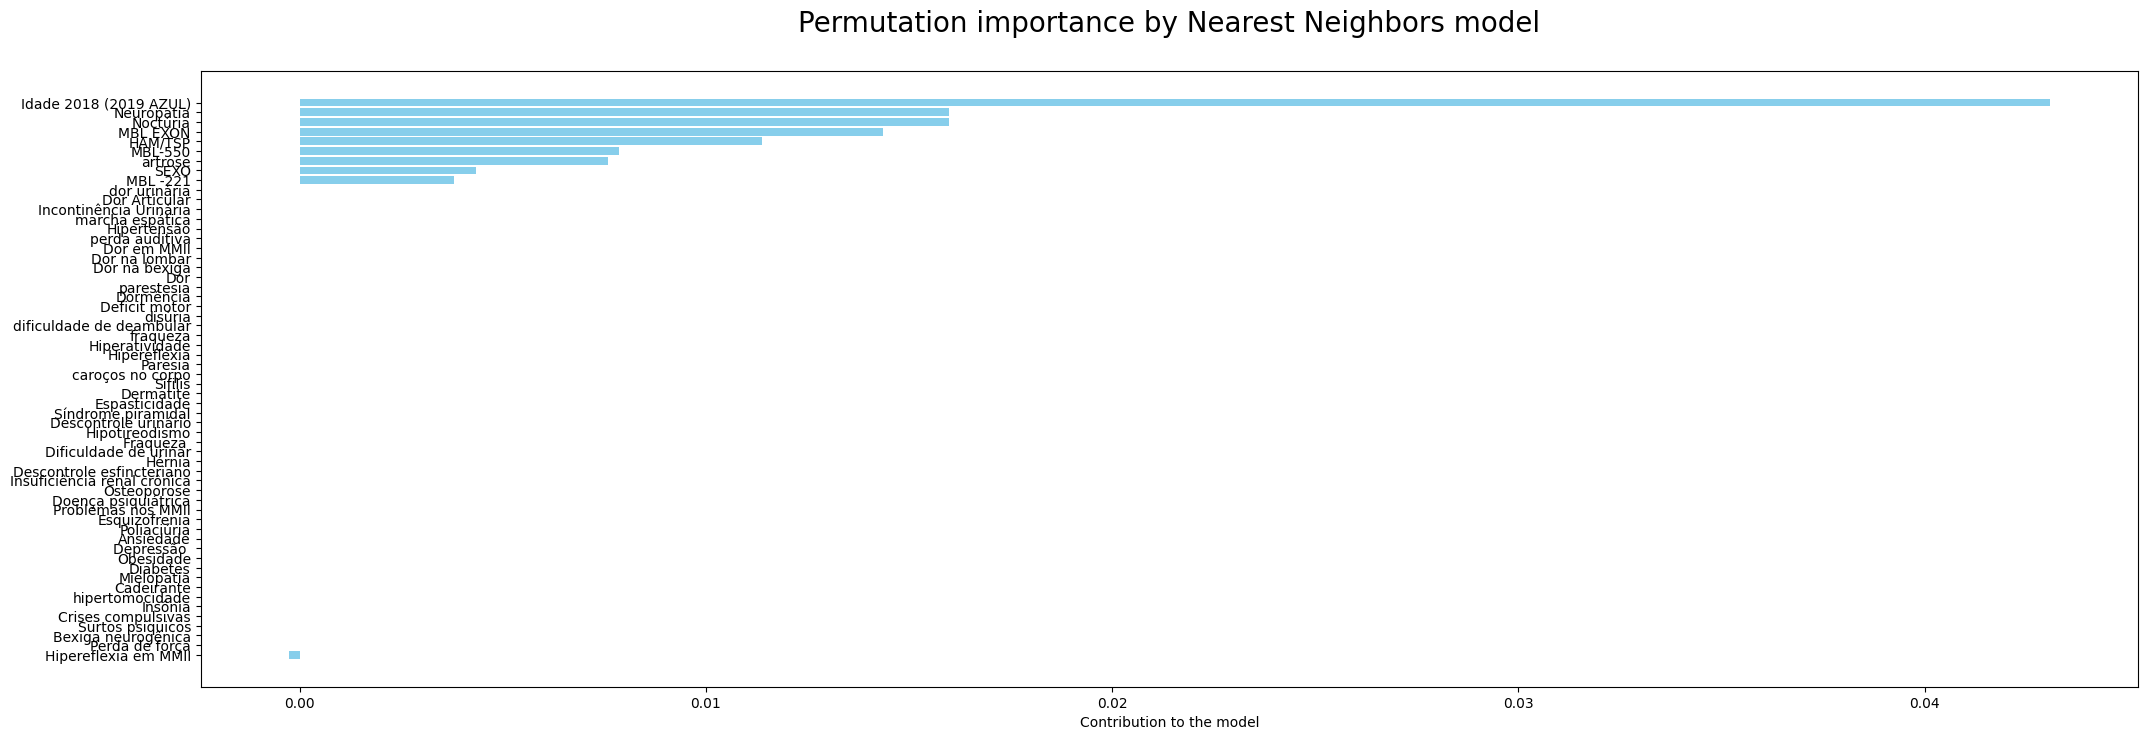

Arquivo referente ao modelo Support Vectors salvo com sucesso!


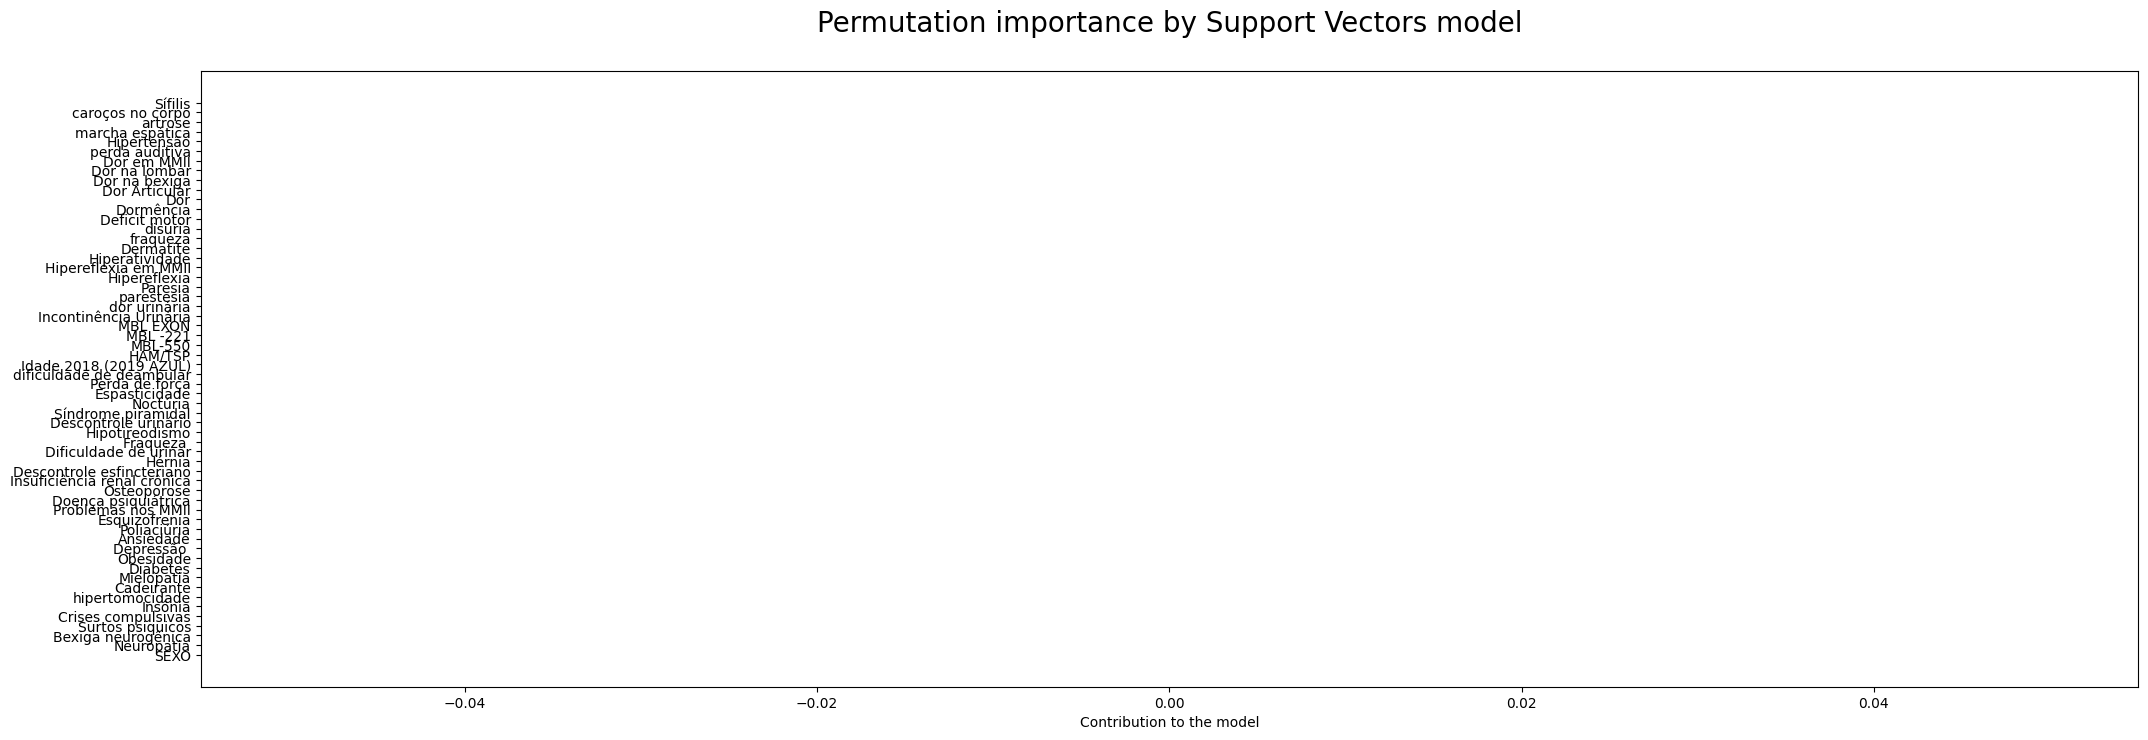

Arquivo referente ao modelo Decision Tree salvo com sucesso!


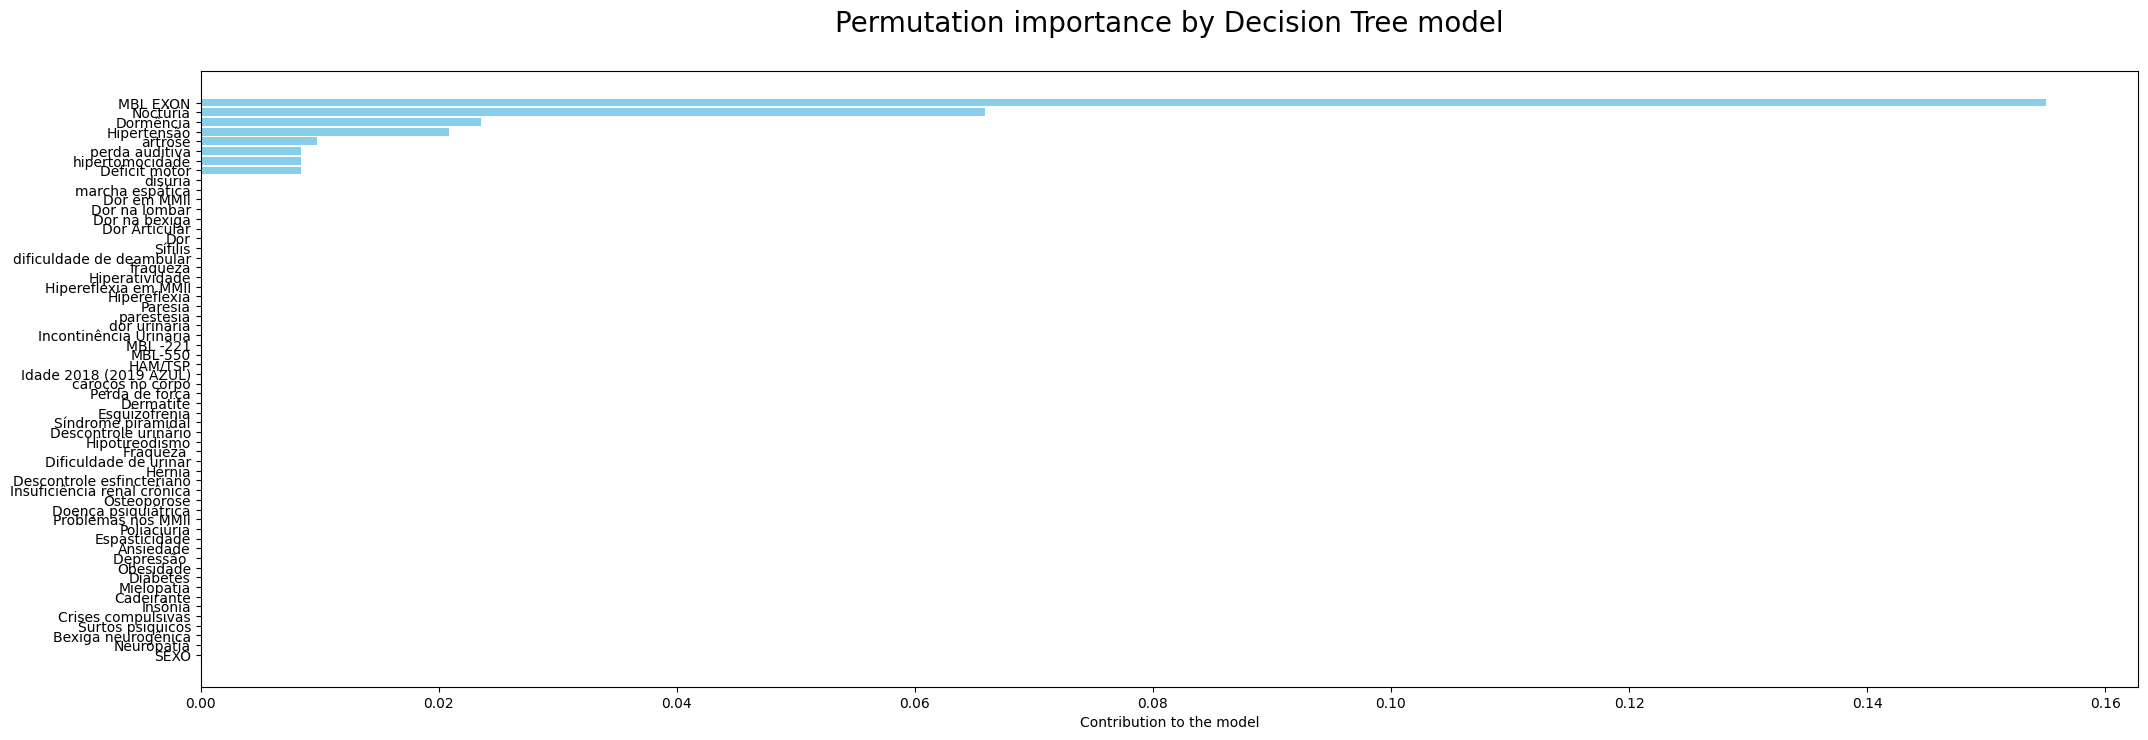

Arquivo referente ao modelo Random Forest salvo com sucesso!


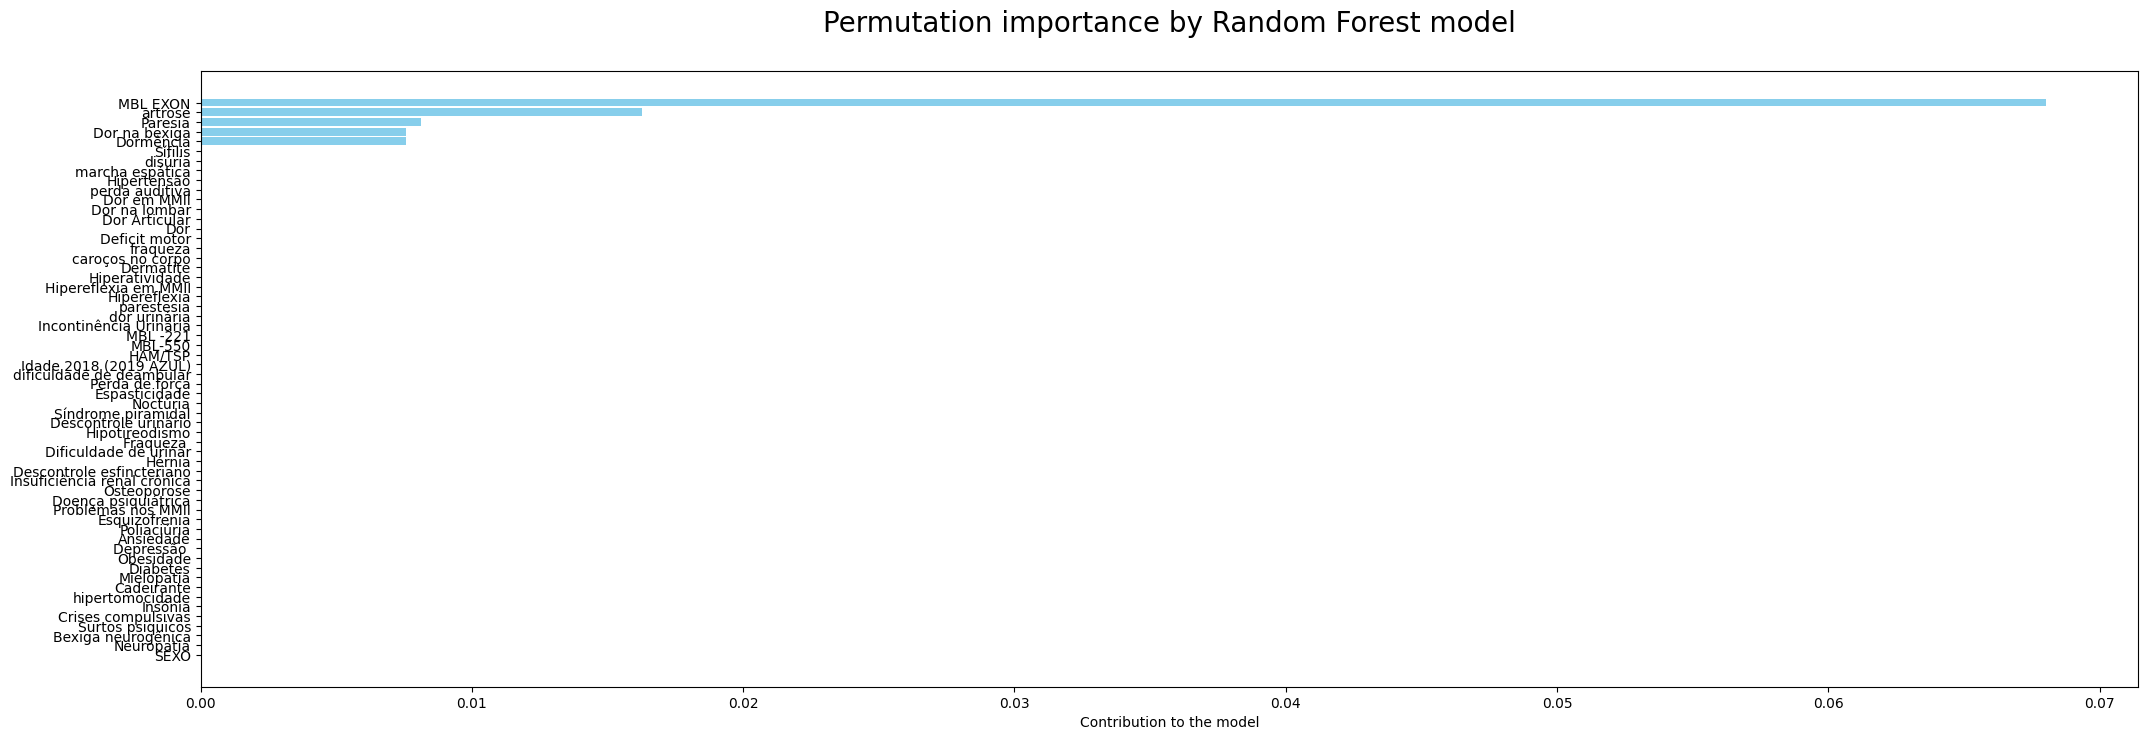

Arquivo referente ao modelo AdaBoost salvo com sucesso!


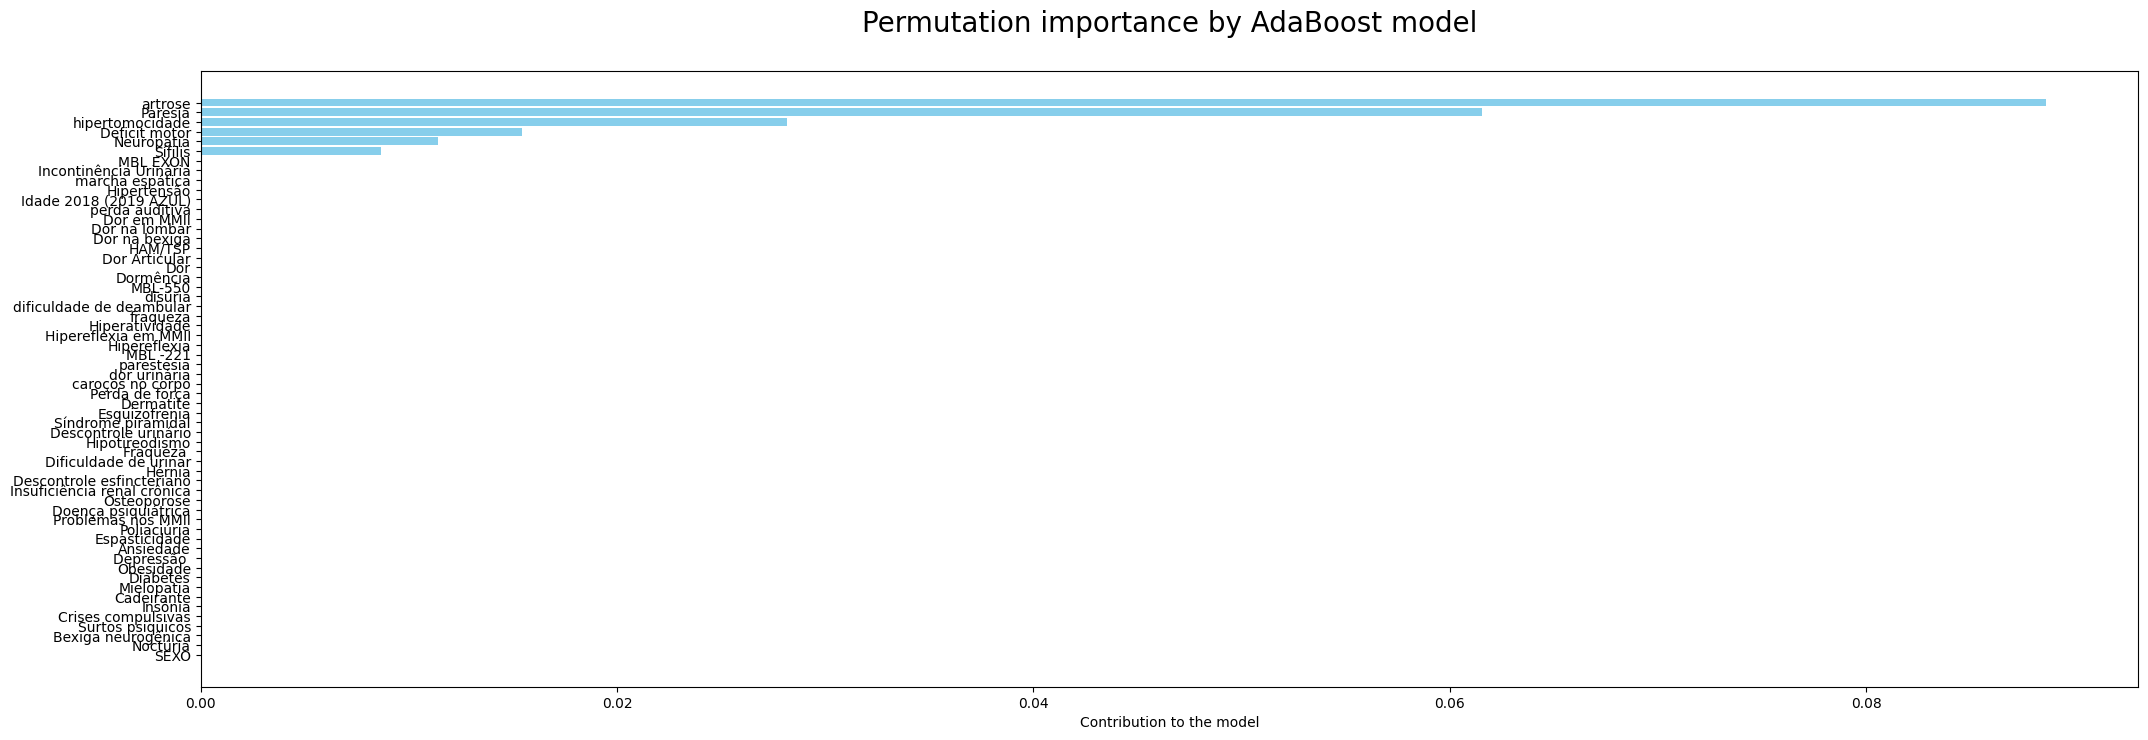

Arquivo referente ao modelo Gradient Boosting salvo com sucesso!


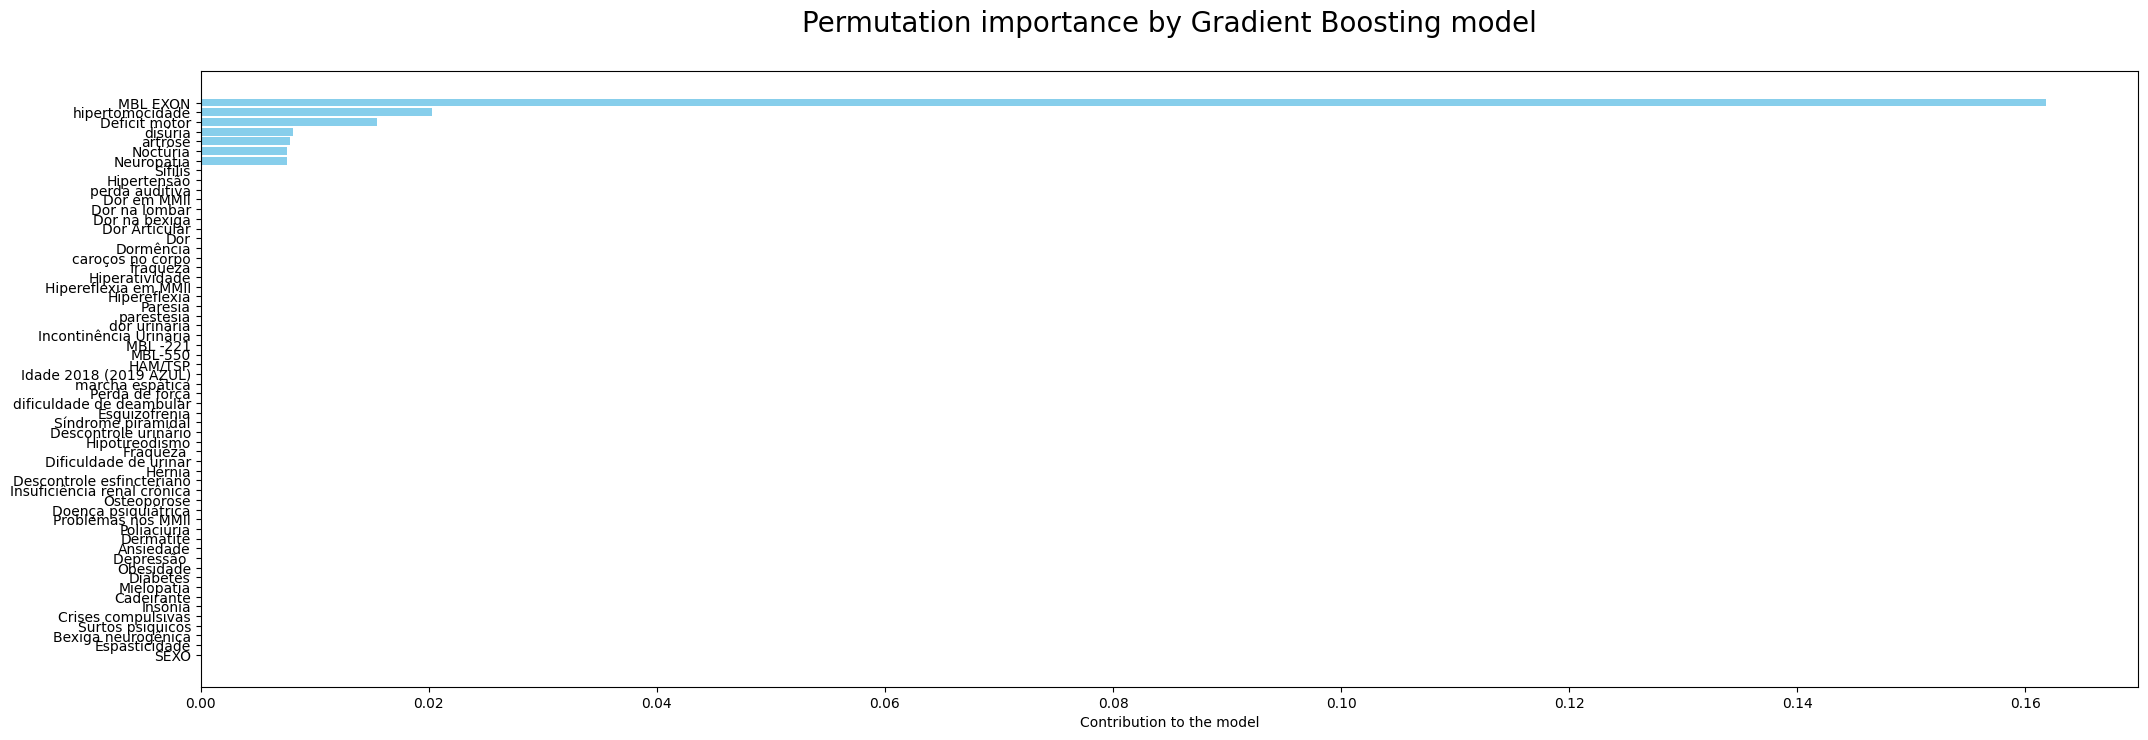

Arquivo referente ao modelo Naive Bayes salvo com sucesso!


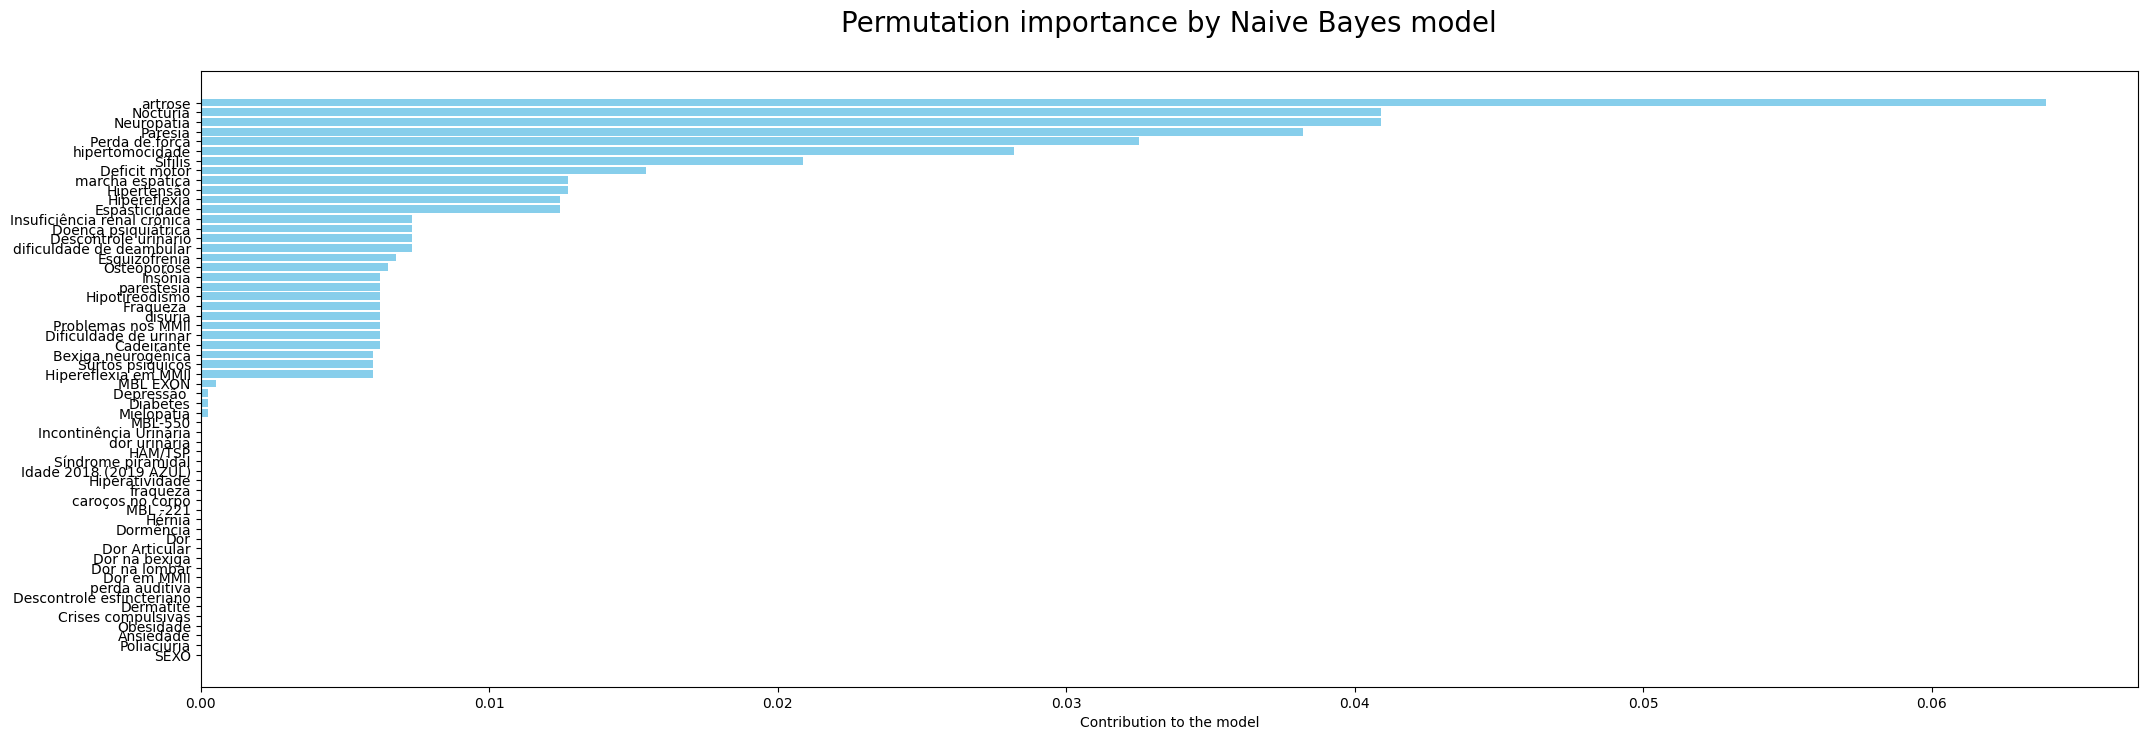

Arquivo referente ao modelo Linear DA salvo com sucesso!


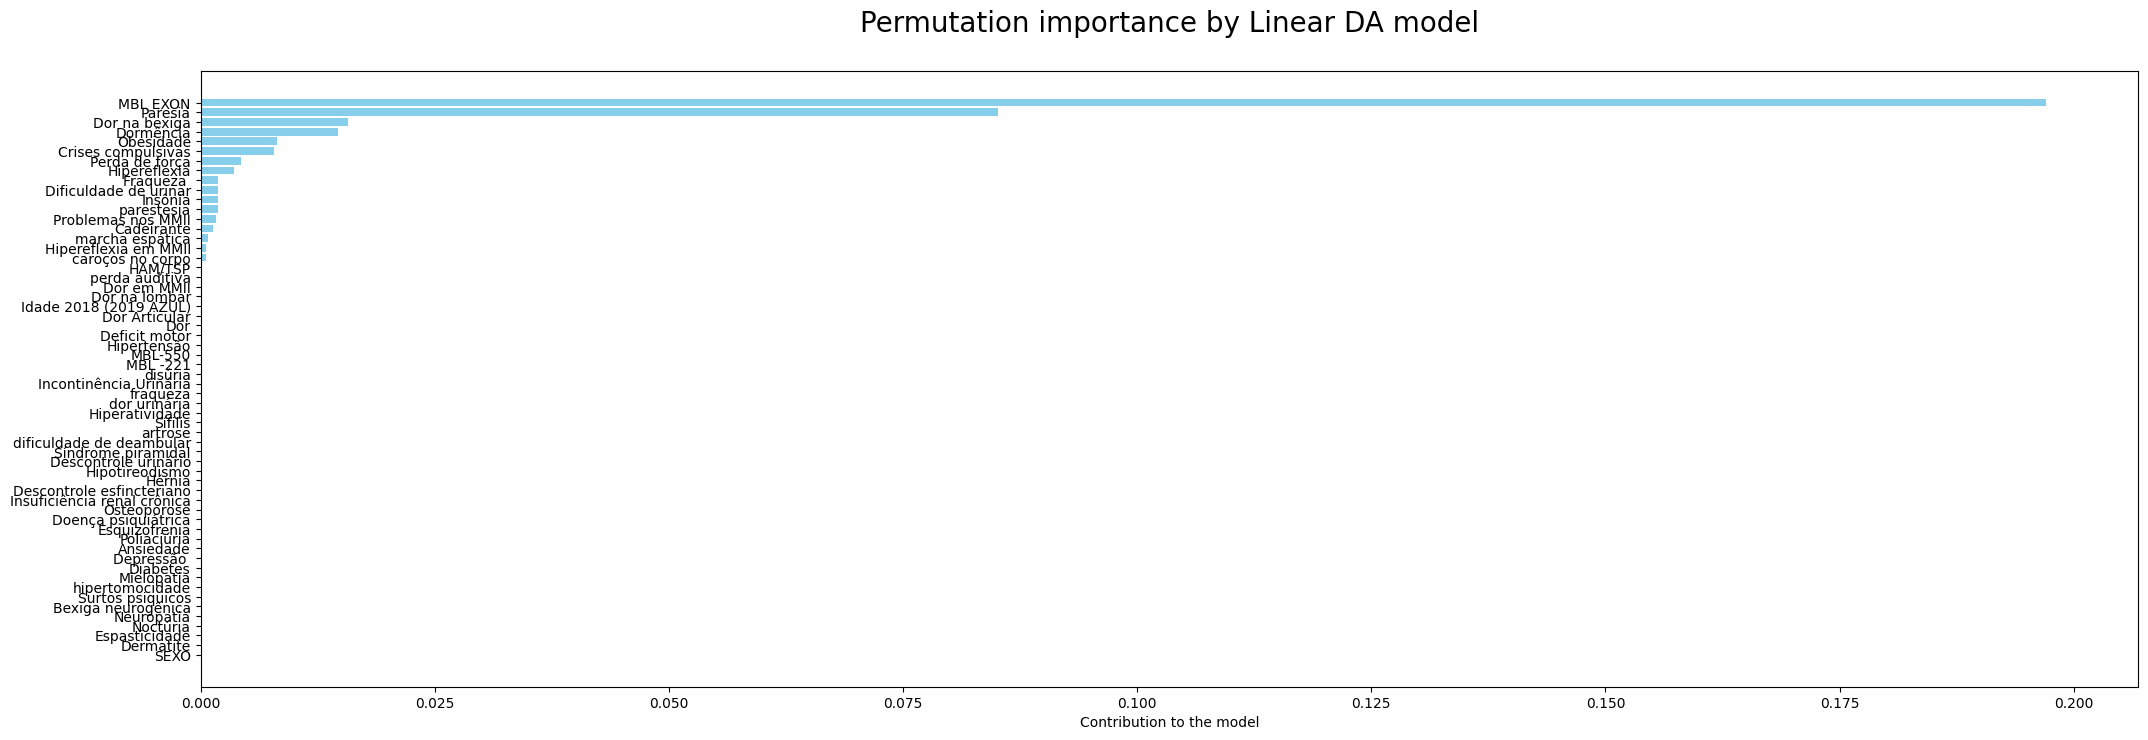

Arquivo referente ao modelo Quadratic DA salvo com sucesso!


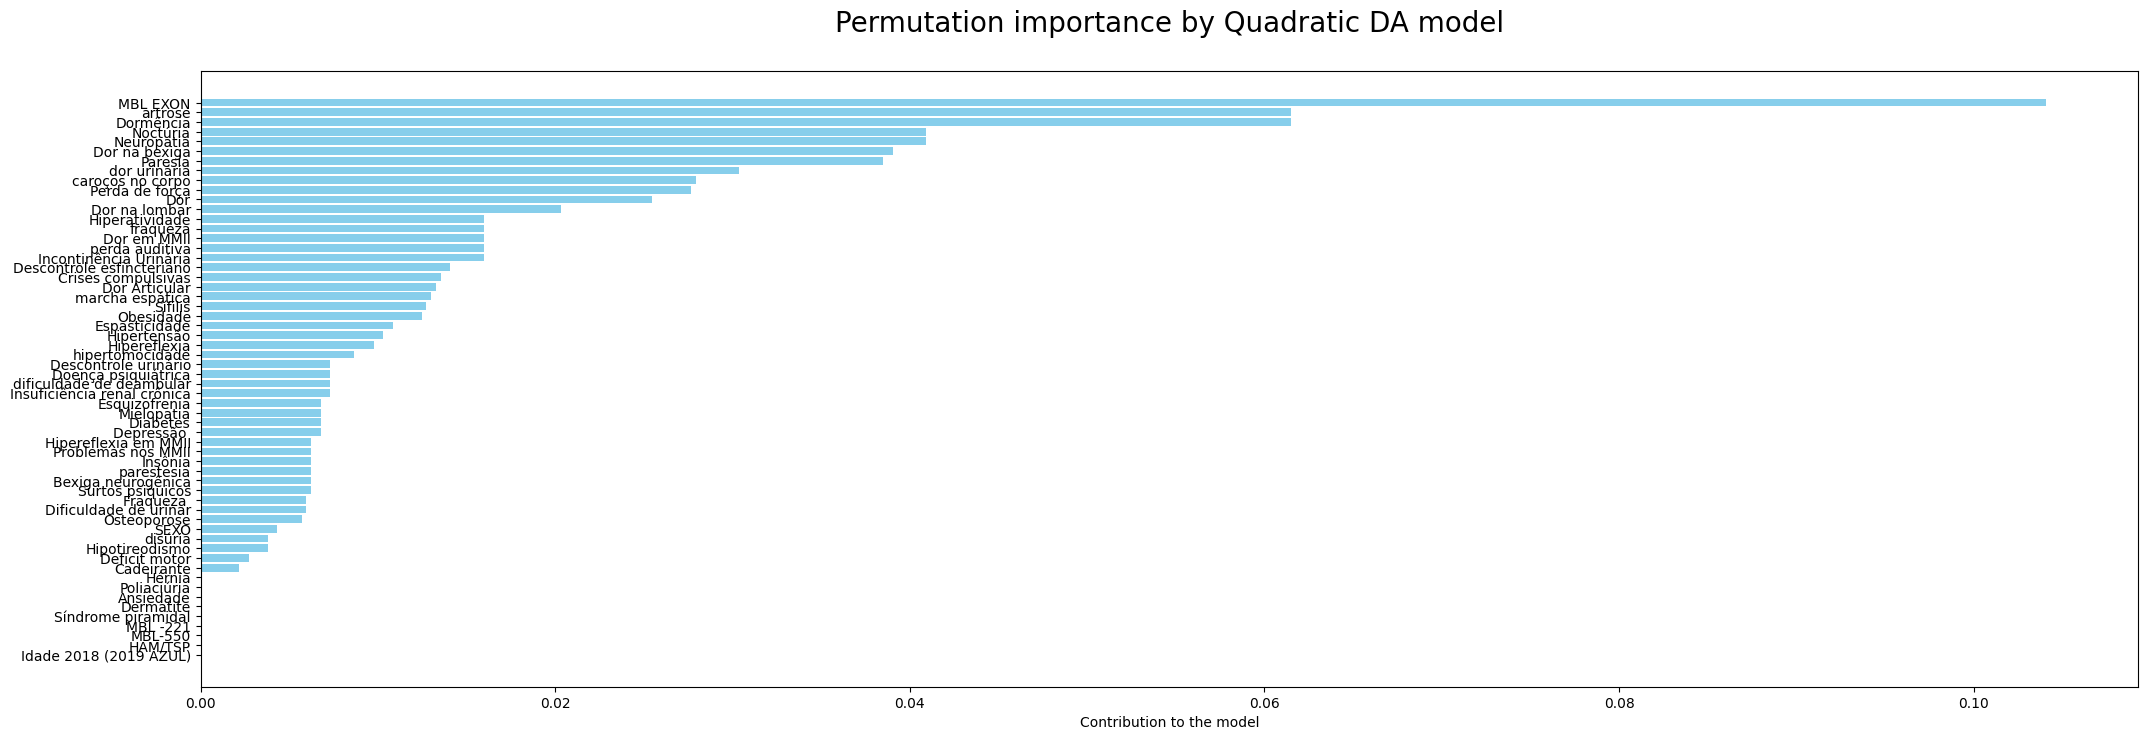

Arquivo referente ao modelo Neural Net salvo com sucesso!


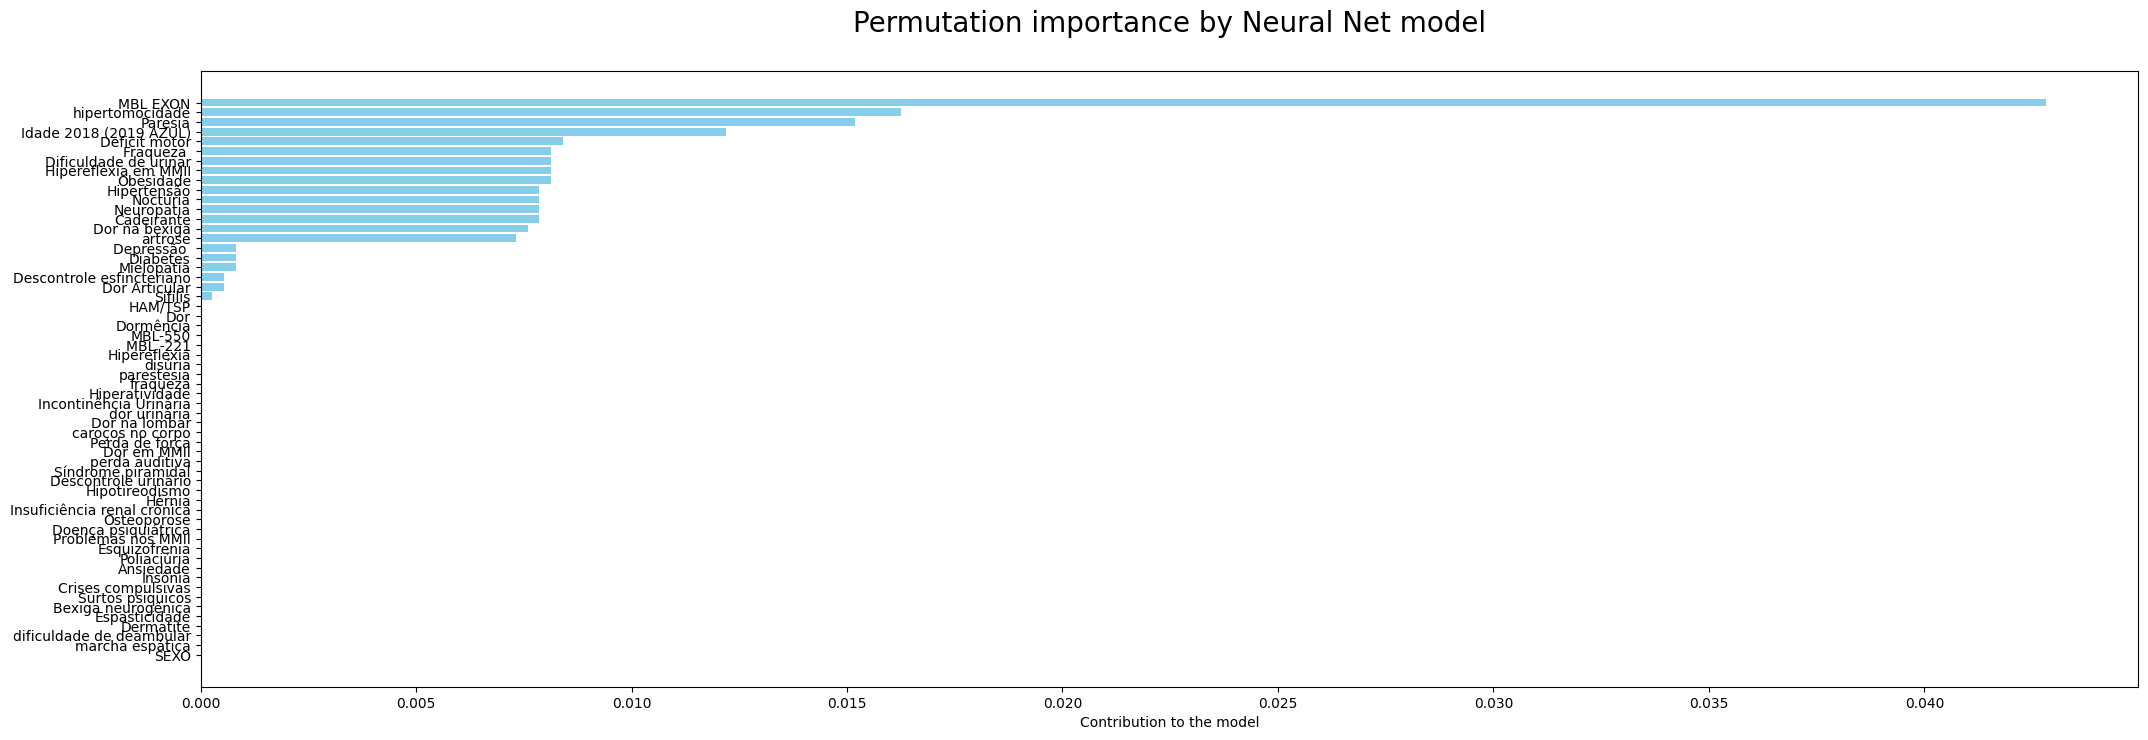

In [19]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import os
import shutil

# Create the column_names matrix
column_names = df.columns

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits)

for item, nome in zip(classifiers, names):
    for fold, (train_index, test_index) in enumerate(skf.split(x, y)):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        item.fit(x_train, y_train)

    # Calculate the importance of permutation using the "item" model
    features_contribution = permutation_importance(item, x_train, y_train, n_repeats=30, random_state=0)
    sorted_indices = np.argsort(features_contribution.importances_mean)

    # Check that the number of columns_names is equal to the consistent sorted_index
    num_features = min(len(column_names), len(sorted_index))

    # Printing permutation importance values and sending them to the drive
    with open(f'Permutation_importance.txt {nome}', 'w') as arquivo:
        print(f'Classifier: {nome}', file=arquivo)
        for i in range(num_features):
            coluna = df.columns[sorted_indices[i]]
            print(f"Feature: {coluna} - Importance: {features_contribution.importances_mean[sorted_index[i]]:.3f} +/- {features_contribution.importances_std[sorted_index[i]]:.3f}", file=arquivo)
            print(file=arquivo)

    # Define the y-axis labels as the names of the columns sorted by importance
    caminho_arquivo = f'/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Permutation_results_txt/Permutation_importance_{nome}.txt'
    caminho_origem = f'Permutation_importance.txt {nome}'
    if os.path.exists(caminho_origem):
        # Move the file to the destination
        shutil.move(caminho_origem, caminho_arquivo)
        print(f"Arquivo referente ao modelo {nome} salvo com sucesso!")
    else:
        print(f"Arquivo referente ao modelo {nome} não foi encontrado")

    # Plotting the horizontal bar chart
    plt.figure(figsize=(25, 8))
    plt.barh(range(x_train.shape[1]), features_contribution.importances_mean[sorted_indices], color='skyblue')
    plt.yticks(range(x_train.shape[1]), [column_names[i] for i in sorted_indices], fontsize=10)
    plt.xlabel('Contribution to the model')
    plt.title(f'Permutation importance by {nome} model', fontsize=20, y=1.05)

    plt.savefig(f'/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Permutation_graphics/Permutation_importance_{nome}.jpeg')
    plt.show()


# Data prevision randomly: (Cell to be debugged)


In [ ]:
# Data prevision randomly:
previsoes = item.predict(x_test[40:45])
previsoes_formatada = ', '.join(str(valor) for valor in previsoes) # concatena lista e converte valores em strings, apresentados separados por ",";
previsoes_formatada = ["Sem mielopatia" if valor == 0 else "HAM/TSP" for valor in previsoes]


print(f"O valor indicado pelo modelo corresponde há: \n{previsoes_formatada} \n")

# Template:
y_teste_lista = y_teste[40:45]
y_teste_lista = ["HAM/TSP" if valor == 1 else "Sem mielopatia" for valor in previsoes]
print(f"O valor real (gabarito), corresponde há:\n{y_teste_lista}")
